<a href="https://colab.research.google.com/github/pmantouvalos/Aggregative-Movie-Preference-Analyzer/blob/main/Aggregative_Movie_Preference_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Aggregative Movie Preference Analyzer**

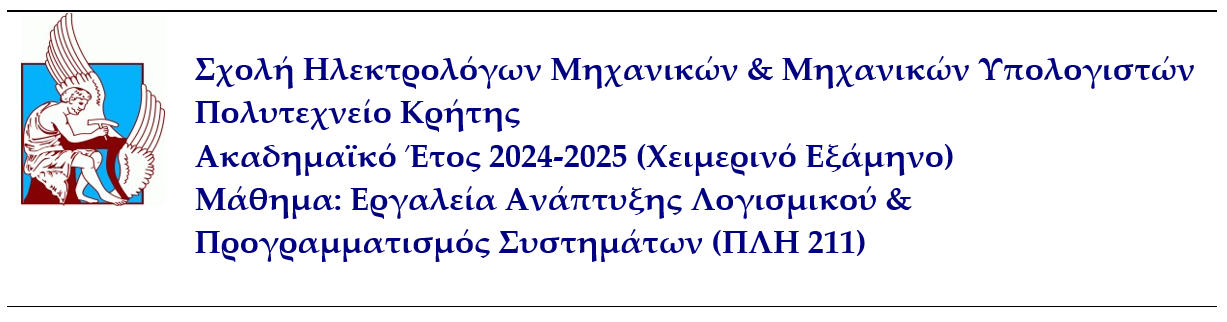


**In this project, my fellow student Konstantinos Petropoulos and I are implementing an Aggregative Preference Movie Analyzer using both Python and Bash scripting.**

# Implementation with Python:

## ⏩ Development Phase

In [2]:
from google.colab import files
import math
from random import random

#create 3 empty dictionaries
movies={}
ratings= {}
tags= {}

#load all files into the dictionaries
#we are using 3 random function in order to work with 0,01% probability in all 3 functions

with open("movies.dat", "r", encoding = "utf-8") as text_file1:
  for line in text_file1:
        #split line of file into parts
        #strip() function removes \n character from string
        if(random() < 0.1):
          word_per_line= line.strip().split('::')
          #place first part (identifier) as the key in the dictionary for ease of calling
          movies[word_per_line[0]]= word_per_line[1::]

with open("ratings.dat", "r", encoding="utf-8") as text_file2:
    for i, line in enumerate(text_file2):
        if i >= 10000:
            break
        word_per_line = line.strip().split('::')
        ratings[i] = word_per_line

with open("tags.dat", "r", encoding = "utf-8") as text_file3:
  i = 0
  for line in text_file3:
    if(random() < 0.1):
      word_per_line = line.strip().split('::')
      tags[i]=word_per_line
      i += 1

#First function rating
def rating(t1,t2):
  valid_mean_rating={}
  for key,value in movies.items():
    movie_count = 0.0
    total_rating = 0.0
    for movie in ratings.values():
      if (movie[1]== key):
       movie_count += 1
       total_rating += float(movie[2])

    if (movie_count!=0 and ((total_rating/movie_count) > t1) and ((total_rating/movie_count) <= t2)):
      #could make it print outright instead of holding dict memory
      valid_mean_rating[value[0]]= total_rating/movie_count

  return valid_mean_rating

#Function to print rating
def print_bounded_average_ratings():
  ratings1=input("Give rating t1 and t2 with space between them").split()
  r1=float(ratings1[0])
  r2=float(ratings1[1])
  print("Movie Title                                                               Average Rating")
  print("----------------------------------------------------------------------------------------")
  chosen_movies=rating(r1,r2)
  for items in chosen_movies.items():
    namelength=len(items[0])
    print(items[0],end="")
    numofloops=0
    while(numofloops+namelength<80):
          print(" ", end="")
          numofloops+=1
    print(f"{items[1]:.1f}")#'items' is a tuple
    print()

#Second function top_movies
def top_movies(k):
    mean_rating={}
    average_rating_sorted={}
    final_sort={}
    itemcount=0
    for key,value in movies.items():
       movie_count = 0.0
       total_rating = 0.0
       for movie in ratings.values():
           if (movie[1]== key):
              movie_count += 1
              total_rating += float(movie[2])

       if (movie_count!=0):
          mean_rating[value[0]]= total_rating/movie_count

    average_rating_sorted= dict(sorted(mean_rating.items(), key=lambda item: item[1],reverse=True))

    for items in average_rating_sorted.items():
        if(itemcount<k):
          final_sort[items[0]]=items[1]
          itemcount+=1

    return final_sort

#Function to print top_movies
def print_top_movies():
  k=float(input("Give the wanted amount of the highest rated movies"))
  print("Movie Title                                                               Average Rating")
  print("----------------------------------------------------------------------------------------")
  final_sort=top_movies(k)
  for items in final_sort.items():
    namelength=len(items[0])
    print(items[0],end="")
    numofloops=0
    while(numofloops+namelength<80):
          print(" ", end="")
          numofloops+=1
    print(f"{items[1]:.1f}")#'items' is a tuple
    print()

# Third function user_pairs
def user_pairs(k):
    users_rated = {}
    count = 0
    for movieID, movie_values in movies.items():
        users_that_rated = []
        users_count = 0
        for value in ratings.values():
            if (value[1] == movieID and users_count<2):
                users_that_rated.append(value[0])
                users_count += 1
        if users_count == 2:
            users_rated[movie_values[0]] = users_that_rated
            count += 1
        if count >= k:
            break
    return users_rated

#Function to print user_pairs
def print_user_pairs():
  k=float(input("Give the amount of user pairs who rated the same movie"))
  print("User 1                       User 2                           Movie Title")
  print("-------------------------------------------------------------------------")
  users_that_rated=user_pairs(k)
  for items in users_that_rated.items():
    namelength=len(items[1][0])
    print(items[1][0],end="")
    numofloops=0
    while(numofloops+namelength<30):
          print(" ", end="")
          numofloops+=1
    print(items[1][1],end="")
    numofloops=0
    namelength=len(items[1][1])
    while(numofloops+namelength<30):
          print(" ", end="")
          numofloops+=1
    print(items[0])
    print()

# Fourth function dominance
def dominance():
  all_movies_info=[]#list in order to have indexing
  non_dominated_movies={}
  for info in movies.items():
    num_of_ratings = 0
    total_rating = 0
    for movie in ratings.values():
      if (movie[1]== info[0]):
       num_of_ratings += 1
       total_rating += float(movie[2])
    if num_of_ratings > 0:
      all_movies_info.append([info[1][0],num_of_ratings, total_rating/num_of_ratings])


  for index1 in range(len(all_movies_info)):
    dominated=False
    for i in range(len(all_movies_info)):
     if(all_movies_info[index1][2]<=all_movies_info[i][2] and all_movies_info[index1][1]<=all_movies_info[i][1]):
        if index1!=i:
          dominated=True
          break

    if not dominated:
        non_dominated_movies[all_movies_info[index1][0]]=[all_movies_info[index1][1], all_movies_info[index1][2]]

  return non_dominated_movies

#Function to print dominance
def print_dominance():
  print("Movie Title                                    Average Rating           Number of Ratings")
  print("-----------------------------------------------------------------------------------------")
  non_dominated_movies=dominance()
  for items in non_dominated_movies.items():
    namelength=len(items[0])
    print(items[0],end="")
    numofloops=0
    while(numofloops+namelength<55):
          print(" ", end="")
          numofloops+=1
    print(f"{items[1][1]:.2f}",end="")
    numofloops=0
    while(numofloops<20):
          print(" ", end="")
          numofloops+=1
    print(items[1][0])
    print()

def iceberg(k, t):
  movie_iceberg={}

  for info in movies.items():
    movie_num = 0
    total_rating = 0
    for movie in ratings.values():
      #take 2 items from values() movie1, movie2
      if (movie[1]== info[0]):
       movie_num += 1
       total_rating += float(movie[2])

    if ((movie_num >= k) and (total_rating/movie_num > t)):
      #could make it print outright instead of holding dict memory
      movie_iceberg[str(info[1][0])]= [movie_num, total_rating/movie_num]

  return movie_iceberg

def print_iceberg():
  k=float(input("Enter the lowest number of ratings:"))
  t = float(input('Enter the lowest average rating:'))
  print("Movie Name                                                              Number of Ratings    Average Rating")
  print("-----------------------------------------------------------------------------------------------------------")
  2
  final_print=iceberg(k, t)
  for mov in final_print.items():
    name=len(mov[0])
    print(mov[0],end="")
    loop_num=0
    while(loop_num + name<80):
          print(" ", end="")
          loop_num += 1
    print(f"{mov[1][0]}                 {round(mov[1][1],1)}")

def top_user(k):
  users={}

  #fill the first k positions of the dict
  for i in range(0, k + 1):
    users[i] = 0

  #calculate the num of ratings per user
  for i in range(0, len(ratings)):
    num_ratings = 0
    for user in ratings.values():
      if (int(user[0])== i):
       num_ratings += 1
    #find the lowest value in the users dict
    lowest = min(users, key=users.get)
    #replace lowest value
    if (num_ratings > users.get(lowest)):
      users[i]= users.pop(lowest)
      users[i] = num_ratings

    users = dict(sorted(users.items(), key=lambda item: item[1], reverse = True))
  return users

def print_top_user():
  k=int(input("Enter the number of users you want to find:"))
  print("User             Number of Movies")
  print("---------------------------------")
  final_print=top_user(k)
  for user in final_print.items():
    print(f"User {user[0]}                 {user[1]}")

def movie_sample(s):
  #list that contains the genre and num of movies
  genre_list = []
  genre_num_list = []
  # #find all genres and how many movies have them
  for genre in movies.values():
    movie_genres = genre[1].strip().split('|')
    for specific_genre in movie_genres:
      if specific_genre in genre_list:
        genre_num_list[genre_list.index(specific_genre)]  += 1
      else:
         genre_num_list.append(1)
         genre_list.append(specific_genre)

  #dict with tag keys and movies concatenated string values
  movie_list = {}
  for i in range(len(genre_list)):
     movie_list[genre_list[i]] = ''
     sample = 0
     for movie in movies.values():
       if sample < int(genre_num_list[i]*(s/100)):
        mov_genre = movie[1].strip().split('|')
        if genre_list[i] in mov_genre:
          movie_list[genre_list[i]] +=f' {movie[0]}'
        sample += 1
  return movie_list


def print_movie_sample():
  s=int(input("Enter the sample of movies you want to see per genre:"))
  print("Genre                           Novie Titles")
  print("--------------------------------------------")
  final_print=movie_sample(s)
  for movie_genres in final_print.items():
    name=len(movie_genres[0])
    print(movie_genres[0],end="")
    loop_num=0
    while(loop_num + name<20):
          print(" ", end="")
          loop_num += 1
    print(f"{movie_genres[1]}")

def similar_users(c):
  similar = []

  # this loop runs more times than there are users so refactoring
  #must focusson shortening the loop amount
  for user_id, rdm_user_movie, rdm_user_rating, rdm_user_time in ratings.values():
      user_movies = []
      user_ratings = []

      #create a loop that takes all movies a user has ever rated
      for userA in ratings.values():
          if int(userA[0]) == user_id:
              user_movies.append(userA[1])
              user_ratings.append(userA[2])

      commonB = []
      commonA = []
      #lists that have lists of the ratings for common movies of users A,B
      common_ratings_for_userB_movies = []
      common_ratings_for_userA_movies = []
      #list to take the user with the common movies
      users_in_common = []
      #tempuser since i know there are no users 0
      current_user = 0

      # Find common movies and ratings between users
      for userB, userB_movie, userB_rating, *_ in ratings.values():
          if int(userB) != user_id:
              if int(userB) == current_user:
                  if userB_movie in user_movies:
                      commonB.append(userB_rating)
                      #find the ratings of user A for the specific movies
                      pos = user_movies.index(userB_movie)
                      commonA.append(user_ratings[pos])
                      if userB not in users_in_common:
                          users_in_common.append(userB)
              else:
                  if (commonB != []):
                      common_ratings_for_userB_movies.append(commonB)
                      common_ratings_for_userA_movies.append(commonA)
                      commonB = []
                      commonA = []
                  current_user = int(userB)
                  if userB_movie in user_movies:
                      commonB.append(userB_rating)
                      pos = user_movies.index(userB_movie)
                      commonA.append(user_ratings[pos])
                      if userB not in users_in_common:
                          users_in_common.append(userB)

      #function to find cosine similarity
      divisible = 0
      divisor_a = 0
      divisor_b = 0
      for k in range(len(common_ratings_for_userB_movies)):
          if k < len(users_in_common):
              for l in range(len(common_ratings_for_userB_movies[k])):
                  divisible += float(common_ratings_for_userB_movies[k][l]) * float(common_ratings_for_userA_movies[k][l])
                  divisor_a += float(common_ratings_for_userA_movies[k][l])**2
                  divisor_b += float(common_ratings_for_userB_movies[k][l])**2

              root_divisor_a = divisor_a**(0.5)
              root_divisor_b = divisor_b**(0.5)

              if (root_divisor_a != 0) and (root_divisor_b != 0):
                  cosine_similarity = divisible / (root_divisor_a * root_divisor_b)
                  if (cosine_similarity > c):
                      similar_temp = [i, users_in_common[k], round(cosine_similarity, 3)]
                      similar.append(similar_temp)

  #Sort similar according to biggest similarity
  similar.sort(reverse=True, key=lambda similar_val: similar_val[2])
  return similar

def print_similar_users():
  c=float(input("Enter the lowest similarity between 2 users:"))
  print("User 1           User 2             Cosine Similarity")
  print("-----------------------------------------------------")
  final_print=similar_users(c)
  for sim_users in final_print:
    loop_num1 = 0
    print(f"{sim_users[0]}", end="")
    while(loop_num1 + len(str(sim_users[0])) < 17):
          print(" ", end="")
          loop_num1 += 1
    print(f"{sim_users[1]}", end="")

    loop_num2 = 0
    while(loop_num2 + len(str(sim_users[1])) < 26):
          print(" ", end="")
          loop_num2 += 1
    print(f"{sim_users[2]}")


def main():
  while True:
    print("Welcome to Movie Analyzer")
    print()
    original_message = input ("Give a number between 1 and 8 in order to call one of the following functions or type 'quit' to quit\n\
    1. 'rating'            (Given t1 and t2, you will get all those movies that have average rating between t1 and t2)\n\
    2. 'top_movies'        (Given k, you will get all k movies with the highest rating)\n\
    3. 'use_pairs'         (Given k, you will get k pairs of users that have rated the same movie)\n\
    4. 'dominance'         (You will get all movies that are not dominated by others)\n\
    5. 'iceberg'           (Given k and t, you will get movies with at least k ratings and average rating above t)\n\
    6. 'top_user'          (Given k, you will get the k user that have rated the most movies)\n\
    7. 'movie_sample'      (Given s, you will get a sample s% of every different movie kind)\n\
    8. 'similar_users'     (Given a similarity threshold Θ, you will get all user pairs with a Cosine Similarity above Θ)\n")



    if original_message.casefold() == "quit":
      print ("Thanks for trusting Movie Analyzer!")
      break

    match original_message:
      case "1":
            print_bounded_average_ratings()
      case "2":
            print_top_movies()
      case "3":
            print_user_pairs()
      case "4":
            print_dominance()
      case "5":
            print_iceberg()
      case "6":
            print_top_user()
      case "7":
            print_movie_sample()
      case "8":
            print_similar_users()



if __name__ == '__main__':
  main()


#446 lines


Welcome to Movie Analyzer

Give a number between 1 and 8 in order to call one of the following functions or type 'quit' to quit
    1. 'rating'            (Given t1 and t2, you will get all those movies that have average rating between t1 and t2)
    2. 'top_movies'        (Given k, you will get all k movies with the highest rating)
    3. 'use_pairs'         (Given k, you will get k pairs of users that have rated the same movie)
    4. 'dominance'         (You will get all movies that are not dominated by others)
    5. 'iceberg'           (Given k and t, you will get movies with at least k ratings and average rating above t)
    6. 'top_user'          (Given k, you will get the k user that have rated the most movies)
    7. 'movie_sample'      (Given s, you will get a sample s% of every different movie kind)
    8. 'similar_users'     (Given a similarity threshold Θ, you will get all user pairs with a Cosine Similarity above Θ)
quit
Thanks for trusting Movie Analyzer!


## ⏩ Logging Phase

The code cell below contains the complete content of the logconfiguration.conf file with the configuration (loggers, handlers, formatters) for the logger.

In [ ]:
%%file logconfiguration.conf
#this is the logger file
#logger declaration and settings

[loggers]
keys = root

[logger_root]
handlers = file
level = NOTSET

#formatter declaration and settings
[formatters]
keys = project

[formatter_project]
format=%(asctime)s - %(name)s - %(levelname)s - %(message)s

#handler declaration and settings
[handlers]
keys = file

[handler_file]
class=FileHandler
backupCount = 10
formatter = project
level = INFO
args = ('logme.txt', 'w')

The code cell below contains the code for the Aggregative Movie Preference Analyzer as it was during the Development phase, BUT here it includes the appropriate commands to create LogRecords so that they are written to a log file named logme.txt.

In [ ]:
%%python
import logging
import logging.config

from google.colab import files
import math
from random import random

logging.config.fileConfig(fname = 'logging.conf', disable_existing_loggers = False)
#Get the logger specified in the file
logger = logging.getLogger(__name__)

#create 3 empty dictionaries
movies={}
ratings= {}
tags= {}

#load all files into the dictionaries
#we are using 3 random function in order to work with 0,01% probability in all 3 functions

with open("movies.dat", "r", encoding = "utf-8") as text_file1:
  for line in text_file1:
        #split line of file into parts
        #strip() function removes \n character from string
        if(random() < 0.1):
          word_per_line= line.strip().split('::')
          #place first part (identifier) as the key in the dictionary for ease of calling
          movies[word_per_line[0]]= word_per_line[1::]

with open("ratings.dat", "r", encoding="utf-8") as text_file2:
    for i, line in enumerate(text_file2):
        if i >= 3000:
            break
        word_per_line = line.strip().split('::')
        ratings[i] = word_per_line


with open("tags.dat", "r", encoding = "utf-8") as text_file3:
  i = 0
  for line in text_file3:
    if(random() < 0.1):
      word_per_line = line.strip().split('::')
      tags[i]=word_per_line
      i += 1

#First function rating
def rating(t1,t2):
  valid_mean_rating={}
  for key,value in movies.items():
    movie_count = 0.0
    total_rating = 0.0
    for movie in ratings.values():
      if (movie[1]== key):
       movie_count += 1
       total_rating += float(movie[2])

    if (movie_count!=0 and ((total_rating/movie_count) > t1) and ((total_rating/movie_count) <= t2)):
      #could make it print outright instead of holding dict memory
      valid_mean_rating[value[0]]= total_rating/movie_count

  logging.info('Exited method rating with no issues')
  return valid_mean_rating

#Function to print rating
def print_bounded_average_ratings():
  ratings1=input("Give rating t1 and t2 with space between them").split()
  r1=float(ratings1[0])
  r2=float(ratings1[1])
  print("Movie Title                                                               Average Rating")
  print("----------------------------------------------------------------------------------------")
  chosen_movies=rating(r1,r2)
  for items in chosen_movies.items():
    namelength=len(items[0])
    print(items[0],end="")
    numofloops=0
    while(numofloops+namelength<80):
          print(" ", end="")
          numofloops+=1
    print(f"{items[1]:.1f}")#'items' is a tuple
    print()

#Second function top_movies
def top_movies(k):
    mean_rating={}
    average_rating_sorted={}
    final_sort={}
    itemcount=0
    for key,value in movies.items():
       movie_count = 0.0
       total_rating = 0.0
       for movie in ratings.values():
           if (movie[1]== key):
              movie_count += 1
              total_rating += float(movie[2])

       if (movie_count!=0):
          mean_rating[value[0]]= total_rating/movie_count

    average_rating_sorted= dict(sorted(mean_rating.items(), key=lambda item: item[1],reverse=True))

    for items in average_rating_sorted.items():
        if(itemcount<k):
          final_sort[items[0]]=items[1]
          itemcount+=1
    logging.info('Exited method top_movies with no issues')
    return final_sort

#Function to print top_movies
def print_top_movies():
  k=float(input("Give the wanted amount of the highest rated movies"))
  print("Movie Title                                                               Average Rating")
  print("----------------------------------------------------------------------------------------")
  final_sort=top_movies(k)
  for items in final_sort.items():
    namelength=len(items[0])
    print(items[0],end="")
    numofloops=0
    while(numofloops+namelength<80):
          print(" ", end="")
          numofloops+=1
    print(f"{items[1]:.1f}")#'items' is a tuple
    print()

# Third function user_pairs
def user_pairs(k):
    users_rated = {}
    count = 0
    for movieID, movie_values in movies.items():
        users_that_rated = []
        users_count = 0
        for value in ratings.values():
            if (value[1] == movieID and users_count<2):
                users_that_rated.append(value[0])
                users_count += 1
        if users_count == 2:
            users_rated[movie_values[0]] = users_that_rated
            count += 1
        if count >= k:
            break
    logging.info('Exited method user_pairs with no issues')
    return users_rated

#Function to print user_pairs
def print_user_pairs():
  k=float(input("Give the amount of user pairs who rated the same movie"))
  print("User 1                       User 2                           Movie Title")
  print("-------------------------------------------------------------------------")
  users_that_rated=user_pairs(k)
  for items in users_that_rated.items():
    namelength=len(items[1][0])
    print(items[1][0],end="")
    numofloops=0
    while(numofloops+namelength<30):
          print(" ", end="")
          numofloops+=1
    print(items[1][1],end="")
    numofloops=0
    namelength=len(items[1][1])
    while(numofloops+namelength<30):
          print(" ", end="")
          numofloops+=1
    print(items[0])
    print()

# Fourth function dominance
def dominance():
  all_movies_info=[]#list in order to have indexing
  non_dominated_movies={}
  for info in movies.items():
    num_of_ratings = 0
    total_rating = 0
    for movie in ratings.values():
      if (movie[1]== info[0]):
       num_of_ratings += 1
       total_rating += float(movie[2])
    if num_of_ratings > 0:
      all_movies_info.append([info[1][0],num_of_ratings, total_rating/num_of_ratings])


  for index1 in range(len(all_movies_info)):
    dominated=False
    for i in range(len(all_movies_info)):
     if(all_movies_info[index1][2]<=all_movies_info[i][2] and all_movies_info[index1][1]<=all_movies_info[i][1]):
        if index1!=i:
          dominated=True
          break

    if not dominated:
        non_dominated_movies[all_movies_info[index1][0]]=[all_movies_info[index1][1], all_movies_info[index1][2]]

  logging.info('Exited method dominance with no issues')
  return non_dominated_movies

#Function to print dominance
def print_dominance():
  print("Movie Title                                    Average Rating           Number of Ratings")
  print("-----------------------------------------------------------------------------------------")
  non_dominated_movies=dominance()
  for items in non_dominated_movies.items():
    namelength=len(items[0])
    print(items[0],end="")
    numofloops=0
    while(numofloops+namelength<55):
          print(" ", end="")
          numofloops+=1
    print(f"{items[1][1]:.2f}",end="")
    numofloops=0
    while(numofloops<20):
          print(" ", end="")
          numofloops+=1
    print(items[1][0])
    print()

def iceberg(k, t):
  movie_iceberg={}

  for info in movies.items():
    movie_num = 0
    total_rating = 0
    for movie in ratings.values():
      #take 2 items from values() movie1, movie2
      if (movie[1]== info[0]):
       movie_num += 1
       total_rating += float(movie[2])

    if ((movie_num >= k) and (total_rating/movie_num > t)):
      #could make it print outright instead of holding dict memory
      movie_iceberg[str(info[1][0])]= [movie_num, total_rating/movie_num]


  logging.info('Exited method iceberg with no issues')
  return movie_iceberg

def print_iceberg():
  k=float(input("Enter the lowest number of ratings:"))
  t = float(input('Enter the lowest average rating:'))
  print("Movie Name                                                              Number of Ratings    Average Rating")
  print("-----------------------------------------------------------------------------------------------------------")
  2
  final_print=iceberg(k, t)
  for mov in final_print.items():
    name=len(mov[0])
    print(mov[0],end="")
    loop_num=0
    while(loop_num + name<80):
          print(" ", end="")
          loop_num += 1
    print(f"{mov[1][0]}                 {round(mov[1][1],1)}")

def top_user(k):
  users={}

  #fill the first k positions of the dict
  for i in range(0, k + 1):
    users[i] = 0

  #calculate the num of ratings per user
  for i in range(0, len(ratings)):
    num_ratings = 0
    for user in ratings.values():
      if (int(user[0])== i):
       num_ratings += 1
    #find the lowest value in the users dict
    lowest = min(users, key=users.get)
    #replace lowest value
    if (num_ratings > users.get(lowest)):
      users[i]= users.pop(lowest)
      users[i] = num_ratings

    users = dict(sorted(users.items(), key=lambda item: item[1], reverse = True))

  logging.info('Exited method top_user with no issues')
  return users

def print_top_user():
  k=int(input("Enter the number of users you want to find:"))
  print("User             Number of Movies")
  print("---------------------------------")
  final_print=top_user(k)
  for user in final_print.items():
    print(f"User {user[0]}                 {user[1]}")

def movie_sample(s):
  #list that contains the genre and num of movies
  genre_list = []
  genre_num_list = []
  # #find all genres and how many movies have them
  for genre in movies.values():
    movie_genres = genre[1].strip().split('|')
    for specific_genre in movie_genres:
      if specific_genre in genre_list:
        genre_num_list[genre_list.index(specific_genre)]  += 1
      else:
         genre_num_list.append(1)
         genre_list.append(specific_genre)

  #dict with tag keys and movies concatenated string values
  movie_list = {}
  for i in range(len(genre_list)):
     movie_list[genre_list[i]] = ''
     sample = 0
     for movie in movies.values():
       if sample < int(genre_num_list[i]*(s/100)):
        mov_genre = movie[1].strip().split('|')
        if genre_list[i] in mov_genre:
          movie_list[genre_list[i]] +=f' {movie[0]}'
        sample += 1

  logging.info('Exited method movie_sample with no issues')
  return movie_list


def print_movie_sample():
  s=int(input("Enter the sample of movies you want to see per genre:"))
  print("Genre                           Novie Titles")
  print("--------------------------------------------")
  final_print=movie_sample(s)
  for movie_genres in final_print.items():
    name=len(movie_genres[0])
    print(movie_genres[0],end="")
    loop_num=0
    while(loop_num + name<20):
          print(" ", end="")
          loop_num += 1
    print(f"{movie_genres[1]}")

def similar_users(c):
  similar = []

  # this loop runs more times than there are users so refactoring
  #must focusson shortening the loop amount
  for user_id, rdm_user_movie, rdm_user_rating, rdm_user_time in ratings.values():
      user_movies = []
      user_ratings = []

      #create a loop that takes all movies a user has ever rated
      for userA in ratings.values():
          if int(userA[0]) == user_id:
              user_movies.append(userA[1])
              user_ratings.append(userA[2])

      commonB = []
      commonA = []
      #lists that have lists of the ratings for common movies of users A,B
      common_ratings_for_userB_movies = []
      common_ratings_for_userA_movies = []
      #list to take the user with the common movies
      users_in_common = []
      #tempuser since i know there are no users 0
      current_user = 0

      # Find common movies and ratings between users
      for userB, userB_movie, userB_rating, *_ in ratings.values():
          if int(userB) != user_id:
              if int(userB) == current_user:
                  if userB_movie in user_movies:
                      commonB.append(userB_rating)
                      #find the ratings of user A for the specific movies
                      pos = user_movies.index(userB_movie)
                      commonA.append(user_ratings[pos])
                      if userB not in users_in_common:
                          users_in_common.append(userB)
              else:
                  if (commonB != []):
                      common_ratings_for_userB_movies.append(commonB)
                      common_ratings_for_userA_movies.append(commonA)
                      commonB = []
                      commonA = []
                  current_user = int(userB)
                  if userB_movie in user_movies:
                      commonB.append(userB_rating)
                      pos = user_movies.index(userB_movie)
                      commonA.append(user_ratings[pos])
                      if userB not in users_in_common:
                          users_in_common.append(userB)

      #function to find cosine similarity
      divisible = 0
      divisor_a = 0
      divisor_b = 0
      for k in range(len(common_ratings_for_userB_movies)):
          if k < len(users_in_common):
              for l in range(len(common_ratings_for_userB_movies[k])):
                  divisible += float(common_ratings_for_userB_movies[k][l]) * float(common_ratings_for_userA_movies[k][l])
                  divisor_a += float(common_ratings_for_userA_movies[k][l])**2
                  divisor_b += float(common_ratings_for_userB_movies[k][l])**2

              root_divisor_a = divisor_a**(0.5)
              root_divisor_b = divisor_b**(0.5)

              if (root_divisor_a != 0) and (root_divisor_b != 0):
                  cosine_similarity = divisible / (root_divisor_a * root_divisor_b)
                  if (cosine_similarity > c):
                      similar_temp = [i, users_in_common[k], round(cosine_similarity, 3)]
                      similar.append(similar_temp)

  #Sort similar according to biggest similarity
  similar.sort(reverse=True, key=lambda similar_val: similar_val[2])

  logging.info('Exited method similar_users with no issues')
  return similar

def print_similar_users():
  c=float(input("Enter the lowest similarity between 2 users:"))
  print("User 1           User 2             Cosine Similarity")
  print("-----------------------------------------------------")
  final_print=similar_users(c)
  for sim_users in final_print:
    loop_num1 = 0
    print(f"{sim_users[0]}", end="")
    while(loop_num1 + len(str(sim_users[0])) < 17):
          print(" ", end="")
          loop_num1 += 1
    print(f"{sim_users[1]}", end="")

    loop_num2 = 0
    while(loop_num2 + len(str(sim_users[1])) < 26):
          print(" ", end="")
          loop_num2 += 1
    print(f"{sim_users[2]}")


def main():
  while True:
    print("Welcome to Movie Analyzer")
    print()
    original_message = input ("Give a number between 1 and 8 in order to call one of the following functions or type 'quit' to quit\n\
    1. 'rating'            (Given t1 and t2, you will get all those movies that have average rating between t1 and t2)\n\
    2. 'top_movies'        (Given k, you will get all k movies with the highest rating)\n\
    3. 'use_pairs'         (Given k, you will get k pairs of users that have rated the same movie)\n\
    4. 'dominance'         (You will get all movies that are not dominated by others)\n\
    5. 'iceberg'           (Given k and t, you will get movies with at least k ratings and average rating above t)\n\
    6. 'top_user'          (Given k, you will get the k user that have rated the most movies)\n\
    7. 'movie_sample'      (Given s, you will get a sample s% of every different movie kind)\n\
    8. 'similar_users'     (Given a similarity threshold Θ, you will get all user pairs with a Cosine Similarity above Θ)\n")

    logging.info(f'Choice of user = {original_message}')


    if original_message.casefold() == "quit":
      print ("Thanks for trusting Movie Analyzer!")
      break

    match original_message:
      case "1":
            print_bounded_average_ratings()
      case "2":
            print_top_movies()
      case "3":
            print_user_pairs()
      case "4":
            print_dominance()
      case "5":
            print_iceberg()
      case "6":
            print_top_user()
      case "7":
            print_movie_sample()
      case "8":
            print_similar_users()




if __name__ == '__main__':
  main()






## ⏩Profiling Phase (Time & Memory)

Here follows the code for an indicative time profiling of one function from the entire code.

In [4]:
!pip install line_profiler
!pip install memory-profiler requests
%load_ext line_profiler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 15.6 MB/s eta 0:00:00


In [5]:
#In this cell we are going to find the execution time of rating(t1,t2)

from line_profiler import LineProfiler

def rating(t1,t2):
  valid_mean_rating={}
  for key,value in movies.items():
    movie_count = 0.0
    total_rating = 0.0
    for movie in ratings.values():
      if (movie[1]== key):
       movie_count += 1
       total_rating += float(movie[2])

    if (movie_count!=0 and ((total_rating/movie_count) > t1) and ((total_rating/movie_count) <= t2)):
      #could make it print outright instead of holding dict memory
      valid_mean_rating[value[0]]= total_rating/movie_count

  return valid_mean_rating


In [6]:
#random selection of t1,t2
t1=2
t2=3
lp = LineProfiler()
lp_wrapper = lp(rating)
lp_wrapper(t1,t2)
lp.print_stats()

Timer unit: 1e-09 s

Total time: 8.08395 s
File: <ipython-input-5-61ce1d7f838a>
Function: rating at line 5

Line #      Hits         Time  Per Hit   % Time  Line Contents
     5                                           def rating(t1,t2):
     6         1       1773.0   1773.0      0.0    valid_mean_rating={}
     7      1068    2358399.0   2208.2      0.0    for key,value in movies.items():
     8      1067     903137.0    846.4      0.0      movie_count = 0.0
     9      1067     293990.0    275.5      0.0      total_rating = 0.0
    10  10671067 3321440053.0    311.3     41.1      for movie in ratings.values():
    11  10670000 4747973284.0    445.0     58.7        if (movie[1]== key):
    12       936    1419921.0   1517.0      0.0         movie_count += 1
    13       936    3073161.0   3283.3      0.0         total_rating += float(movie[2])
    14                                           
    15      1067    2524220.0   2365.7      0.0      if (movie_count!=0 and ((total_rating/

Here follows the code for an indicative memory profiling of one function from the entire code.

In [7]:
!pip install memory-profiler requests

In [8]:
%%file dominance_memprof.py
#In this cell we are finding the memory usage of each line of dominance()
from random import random
from google.colab import files
from memory_profiler import profile
import math
#create 3 empty dictionaries
movies={}
ratings= {}
tags= {}

#load all files into the dictionaries
#we are using 3 random function in order to work with 0,01% probability in all 3 functions

with open("movies.dat", "r", encoding = "utf-8") as text_file1:
  for line in text_file1:
        #split line of file into parts
        #strip() function removes \n character from string
        if(random() < 0.1):
          word_per_line= line.strip().split('::')
          #place first part (identifier) as the key in the dictionary for ease of calling
          movies[word_per_line[0]]= word_per_line[1::]

with open("ratings.dat", "r", encoding="utf-8") as text_file2:
    for i, line in enumerate(text_file2):
        if i >= 10000:
            break
        word_per_line = line.strip().split('::')
        ratings[i] = word_per_line

with open("tags.dat", "r", encoding = "utf-8") as text_file3:
  i = 0
  for line in text_file3:
    if(random() < 0.1):
      word_per_line = line.strip().split('::')
      tags[i]=word_per_line
      i += 1


@profile
def main():
    all_movies_info=[]#list in order to have indexing
    non_dominated_movies={}
    for info in movies.items():
      num_of_ratings = 0
      total_rating = 0
      for movie in ratings.values():
       if(movie[1]== info[0]):
         num_of_ratings += 1
         total_rating += float(movie[2])
      if num_of_ratings > 0:
        all_movies_info.append([info[1][0],num_of_ratings, total_rating/num_of_ratings])


    for index1 in range(len(all_movies_info)):
      dominated=False
      for i in range(len(all_movies_info)):
       if(all_movies_info[index1][2]<=all_movies_info[i][2] and all_movies_info[index1][1]<=all_movies_info[i][1]):
          if index1!=i:
            dominated=True
            break

      if not dominated:
          non_dominated_movies[all_movies_info[index1][0]]=[all_movies_info[index1][1], all_movies_info[index1][2]]

    return non_dominated_movies

if __name__ == "__main__":
    main()

Writing dominance_memprof.py


In [9]:
!python -m memory_profiler dominance_memprof.py

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/memory_profiler.py", line 1252, in exec_with_profiler
    exec(compile(f.read(), filename, 'exec'), ns, ns)
  File "dominance_memprof.py", line 68, in <module>
    main()
  File "/usr/local/lib/python3.10/dist-packages/memory_profiler.py", line 1188, in wrapper
    val = prof(func)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/memory_profiler.py", line 761, in f
    return func(*args, **kwds)
  File "dominance_memprof.py", line 47, in main
    if(movie[1]== info[0]):
  File "dominance_memprof.py", line 47, in main
    if(movie[1]== info[0]):
  File "/usr/local/lib/python3.10/dist-packages/memory_profiler.py", line 799, in trace_memory_usage
    self.code_map.trace(frame.f_code, self.prevlines[-1], self.prev_lineno)
  File "/usr/local/lib/python3.10/dist-packages/memory_profiler.py", line 680, in trace
    prev_line_value = self[code].get(prev_lineno, None) if prev_lineno else None
Keyb

# Implementation with Bash Script:

# ⏩ Bash Script Aggregative Movie Preference Analyzer

In [2]:
!head -100 movies.dat > file1.txt && paste <(cut -f1 -d":" file1.txt) <(cut -f3 -d":" file1.txt) <(cut -f5 -d":" file1.txt) -d"*" > movies.modified.txt

In [3]:
!head -300 ratings.dat > file2.txt && paste <(cut -f1 -d":" file2.txt) <(cut -f3 -d":" file2.txt) <(cut -f5 -d":" file2.txt) -d"*" > ratings.modified.txt

In [1]:
!sudo apt-get install bc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  bc
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 87.6 kB of archives.
After this operation, 220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 bc amd64 1.07.1-3build1 [87.6 kB]
Fetched 87.6 kB in 0s (251 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package bc.
(Reading database ... 123634 files and directories currently installed.

In [ ]:
%%file aggregative_movie_preference_analyzer.sh

function rating()
{
  #dictionary to hold the output of function
 declare -A movies_ratings

  echo -n "Enter the lowest average rating:"
  read t1
  echo -n "Enter the highest average rating:"
  read t2

 #change IFS cause the rewritten files work with *
 OLDIFS="$IFS"

  #read all movies from the file
  while IFS="*" read -r movie1_id movie_name movie_genre
  do
    movie_num=0
    total_rating=0
    #read all ratings for specific movie
    while IFS="*" read -r user movie2_id movie_rating
  do
    #check if the rating refers to the specific movie and increase counters
    if [ "$movie1_id" == "$movie2_id" ]
  then
        movie_num=$(($movie_num + 1))
        total_rating=$(echo "scale=3; $total_rating + $movie_rating" | bc)
  fi
    done < "ratings.modified.txt"

 #check for division by zero
 if [ $movie_num -ne 0 ]
 then
  av_rating=$(echo "scale=3; $total_rating/$movie_num" | bc)
  #check if average rating is between parameters
  if (( $(bc <<<"$av_rating < $t2") )) && (( $(bc <<<"$av_rating > $t1") ))
  then
         movies_ratings["$movie_name"]="$av_rating"
  fi
 fi
    done < "movies.modified.txt"

  #restore IFS
  IFS="$OLDIFS"

  #print the output of the function
  echo -e "\nMovie Title                                                   Average Rating"
  echo "---------------------------------------------------------------------------------"
    for id in "${!movies_ratings[@]}"
      do
        for ((koko="${#id}"; koko <= 65; koko++))
        do
            spaces="$spaces "
        done
        echo "$id$spaces ${movies_ratings[$id]}"
        #reset the spaces betwwen movie id and positive sent
        spaces=" "

    done
}

function top_movies()
{
  #check if the file i want to place movies info into exists and delete it
  if [ -e moviesList.txt ]
  then
    #according to Linux_Commands.ipynd we should always use the -i instead of -f
    rm -i moviesList.txt
  fi

  echo -n "Enter the amount of movies to print:"
  read k

 #change IFS cause the rewritten files work with *
 OLDIFS="$IFS"

  #read all movies from the file
  while IFS="*" read -r movie1_id movie_name movie_genre
  do
    movie_num=0
    total_rating=0
    #read all ratings for specific movie
    while IFS="*" read -r user movie2_id movie_rating
  do
    #check if the rating refers to the specific movie and increase counters
    if [ "$movie1_id" == "$movie2_id" ]
  then
        movie_num=$(($movie_num + 1))
        total_rating=$(echo "scale=3; $total_rating + $movie_rating" | bc)
  fi
    done < "ratings.modified.txt"

 #check for division by zero
 if [ $movie_num -ne 0 ]
 then
  av_rating=$(echo "scale=3; $total_rating/$movie_num" | bc)
  #append the output into a file so i dont hold memory with a variable
  echo "$movie_name*$av_rating" >> moviesList.txt
 fi
    done < "movies.modified.txt"

  #linux command that sorts my file numerically according to the last field and reverses the order
sort -nr +1 moviesList.txt > temp.txt && mv temp.txt moviesList.txt


  #print the output of the function
  count=0
  echo -e "\nMovie Title                                                  Average Rating"
  echo "--------------------------------------------------------------------------------"
  while IFS="*" read -r  cur_movie     cur_movie_rating
  do
    if [ $count -ne $k ]
    then
          for ((koko="${#cur_movie}"; koko <= 65; koko++))
        do
            spaces="$spaces "
        done
          echo "$cur_movie$spaces $cur_movie_rating"
          count=$(($count + 1))
        #reset the spaces betwwen movie id and positive sent
        spaces=" "

    else
       break
  fi

    done < "moviesList.txt"

  #restore IFS
  IFS="$OLDIFS"

}

function dominance()
{
  #check if the file i want to place movies info into exists and delete it
  if [ -e moviesList.txt ]
  then
    #according to Linux_Commands.ipynd we should always use the -i instead of -f
    rm -i moviesList.txt
  fi

  #dictionary to hold the output of function
  declare -A non_dominated

 #change IFS cause the rewritten files work with *
 OLDIFS="$IFS"

  #read all movies from the file
  while IFS="*" read -r movie1_id movie_name movie_genre
  do
    movie_num=0
    total_rating=0
    #read all ratings for specific movie
    while IFS="*" read -r user movie2_id movie_rating
  do
    #check if the rating refers to the specific movie and increase counters
    if [ "$movie1_id" == "$movie2_id" ]
  then
        movie_num=$(($movie_num + 1))
        total_rating=$(echo "scale=3; $total_rating + $movie_rating" | bc)
  fi
    done < "ratings.modified.txt"

 #check for division by zero
 if [ $movie_num -ne 0 ]
 then
  av_rating=$(echo "scale=3; $total_rating/$movie_num" | bc)
    #append the output into a file since it will be modified to get the output
    echo "$movie_name*$av_rating*$movie_num" >> moviesList.txt
 fi
    done < "movies.modified.txt"

#double loop to read all info from the file and compare each movies
while IFS="*" read -r m1 m1_rating m1_num
  do

  while IFS="*" read -r m2 m2_rating m2_num
  do
  #check if the values are between parameters to be non-dominated
    if (( $(bc <<<"$m1_rating > $m2_rating") )) || (( $(bc <<<"$m1_num > $m2_num") ))
    then
        non_dominated["$m1"]="$m1_rating              $m1_num"
        break
    fi
  done < "moviesList.txt"

  done < "moviesList.txt"

  #restore IFS
  IFS="$OLDIFS"

  #print the output of the function
  echo -e "\nMovie Title                                                      Average Rating    Number of Ratings"
  echo "---------------------------------------------------------------------------------------------------------"
    for id in "${!non_dominated[@]}"
      do
        for ((koko="${#id}"; koko <= 65; koko++))
        do
            spaces="$spaces "
        done
          echo "$id$spaces  ${non_dominated[$id]}"
        #reset the spaces betwwen movie id and positive sent
        spaces=" "

    done
}

function iceberg()
{
  #dictionary to hold the output of function
  declare -A movies_iceberg

  echo -n "Enter the lowest amount of ratings:"
  read k
  echo -n "Enter the lowest average rating:"
  read t

 #change IFS cause the rewritten files work with *
 OLDIFS="$IFS"

  #read all movies from the file
  while IFS="*" read -r movie1_id movie_name movie_genre
  do
    movie_num=0
    total_rating=0
    #read all ratings for specific movie
    while IFS="*" read -r user movie2_id movie_rating
  do
    #check if the rating refers to the specific movie and increase counters
    if [ "$movie1_id" == "$movie2_id" ]
  then
        movie_num=$(($movie_num + 1))
        total_rating=$(echo "scale=3; $total_rating + $movie_rating" | bc)
  fi
    done < "ratings.modified.txt"

 #check for division by zero
 if [ $movie_num -ne 0 ]
 then
  av_rating=$(echo "scale=3; $total_rating/$movie_num" | bc)
  #check if average rating and amount of ratings are between parameters
  if (( $(bc <<<"$movie_num >= $k") )) && (( $(bc <<<"$av_rating > $t") ))
  then
         movies_iceberg["$movie_name"]="$av_rating              $movie_num"
  fi
 fi
    done < "movies.modified.txt"

  #restore IFS
  IFS="$OLDIFS"


  #print the output of the function
  count=0
  echo -e "\nMovie Title                                                      Average Rating     Number Of Ratings"
  echo "------------------------------------------------------------------------------------------------------"
  for id in "${!movies_iceberg[@]}"
    do
      for ((koko="${#id}"; koko <= 65; koko++))
      do
          spaces="$spaces "
     done
        echo "$id$spaces  ${movies_iceberg[$id]}"
    #reset the spaces betwwen movie id and positive sent
    spaces=" "

  done



}


function top_user()
{

#take the distinct users (1st columm) from the modified file without same number repetitions
cut -f1 -d'*' ratings.modified.txt | sort -n | uniq > distinct_users.txt
  #check if the file i want to place users info into exists and delete it
  if [ -e user_ratings.txt  ]
  then
    #according to Linux_Commands.ipynd we should always use the -i instead of -f
    rm -i user_ratings.txt
  fi

  #dictionary to hold the output of function
  declare -A users

  echo -n "Enter the number of users to be printed:"
  read k

  #read all unique users from the file
  while read -r user
  do
    num_ratings=0

    #change IFS here cause only ratings works with *
    OLDIFS="$IFS"
    #read all ratings for specific user
    while IFS="*" read -r user1 movie2_id movie_rating
  do
    #check if the rating refers to the specific user and increase counter
    if [ "$user" == "$user1" ]
    then
        num_ratings=$(($num_ratings + 1))
    fi
  done < "ratings.modified.txt"

    #place the user and the total num of moies rated in a file to be sotred
    echo "$user $num_ratings" >> user_ratings.txt
  done < "distinct_users.txt"


#sort the users based on most ratings
sort -nr +1 user_ratings.txt > temp.txt && mv temp.txt user_ratings.txt

  #restore IFS
  IFS="$OLDIFS"

  #print the output of the function
  num=0
  echo -e "\nMovie Title           Number of Ratings"
  echo "----------------------------------------"
  while read -r user total_ratings
    do
      #only print k requested users
      if [ "$num" -ne "$k" ]
      then
          echo "$user                        $total_ratings"
          num=$(($num + 1))
      else
          break
      fi
    done < "user_ratings.txt"
}


while true
do
echo -e "\nWelcome to movie analyser in Bash, choose what you want to do"
echo -e "1.rating\n2.top_movies\n3.dominance\n4.iceberg\n5.top_user\n6.quit"
read option

case "$option" in

1)
  rating
  ;;
2)
  top_movies
  ;;
3)
  dominance
  ;;
4)
  iceberg
  ;;
5)
  top_user
  ;;
6)
  echo "Thanks for using movie analyser"
  break
  ;;
esac
done

In [ ]:
!chmod +x aggregative_movie_preference_analyzer.sh

In [ ]:
!./aggregative_movie_preference_analyzer.sh.sh

# Movies Sentiment Analyser in Bash Script

In [ ]:
!head -300 tags_stemmed_tokenized_clean_no_stopwords.dat > file3.txt && paste <(cut -f3 -d":" file3.txt) <(cut -f5 -d":" file3.txt) -d"*" > tags.modified.txt

In [ ]:
%%file movies_sentiment_analyser.sh

#take the movie_ids (1st columm) from the modified file without same number repetitions
cut -f1 -d'*' tags.modified.txt | sort -n | uniq > movie_ids.txt

#fucntion
function sentiment()
{
    #dictionary to store function output
    declare -A movie_sentiment


    #change IFS cause the rewritten files work with *
    OLDIFS="$IFS"
    #loop for every unique movie id in the file
    while read -r specific_movie
    do

    #counters for sentiments
    positive=0
    negative=0
    #loops for all tags in the file
    while IFS="*" read -r movie_id phrase
    do
      #check if the current tag is refering to my specific movie
      if [ "$specific_movie" == "$movie_id" ]
    then

    #restore IFS
    IFS="$OLDIFS"
    for word in $phrase
    do
    #use grep to compare the tag with all lines(words) of the sentiment files
    #use -i cause we dont care about capitalised/non-capitalised words -w cause we want the exact words not aproximations
    #since grep returns the line it finds i have redirected the output to a bin file
    if grep -iw "$word" positive_stems.txt > bin
    then
         positive=$(($positive + 1))
    elif grep -iw "$word"  negative_stems.txt > bin
    then
        negative=$(($negative + 1))
     fi
    done

    fi
    done < "tags.modified.txt"

    #calcualte total sentiment of specific movie
    if [ $positive -gt $negative ]
    then
        sent="positive"
    elif [ $positive -lt $negative ]
    then
        sent="negative"
    else
        sent="neutral"
    fi

    #place info in the dictionary
    movie_sentiment["$specific_movie"]=" $positive               $negative             $sent"
    done < "movie_ids.txt"

    #print the output
    echo "movie_id      positive_count    negative_count    sentiment "
    echo "------------------------------------------------------------"
    for id in "${!movie_sentiment[@]}"
      do
  #loop to ensure equal spacing  in the output so it is print uniformally
  #the {#id} is a bash function and it finds the length of the string id
  for ((koko="${#id}"; koko <= 17; koko++))
  do
      spaces="$spaces "
  done
      echo "$id$spaces ${movie_sentiment[$id]}"
      #reset the spaces betwwen movie id and positive sent
      spaces=" "
    done

  #restore IFS
  IFS="$OLDIFS"

}
#call the function
sentiment
